<a href="https://colab.research.google.com/github/harishahamed26/online-shoppers-intension-Machine-learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment
"""

Student ID              :   22141506

University              :   Birmingham City University

Course                  :   Msc Artificial Intelligence

Module Title            :   MACHINE LEARNING

Module Code             :   CMP7288

Assessment Title        :   Coursework 

Assessment Identifier   :   CWRK001

School                  :   School of Computing and Digital Technology

Module Co-ordinator     :   Besher Alhalabi

Code Created Date       :   28-DEC-2022

Programmming Language   :   Python V3.8.16

Dataset Name            :   Online Shopper Intention

File Type               :   CSV

Assessment Summary      : In this assessment the student will apply modern machine learning techniques to solve real-world analytics problems. Each student will submit a comprehensive report detailing the proposed work, results and conclusions.
The report will be submitted as one deliverable in the form of a written report. The standard of academic writing should be excellent. (Maximum words: 4000 words, excluding tables, figures and references).
        

Program Description     : 

Online Shoppers intenstion dataset, I try to predict the revenue of based on the customer using the Support Vector Machine and Gaussian Naive Bayes model and determined which model is best for supervised learned. For the unsupervised learning I used K-Mean to do the  clustering

Steps To be followed    :
1. Execution of EDA section
2. Execution of Supervised Learning Section
3. Execution of Unsupervised Learning Section
     
Version.                : 1.0
  
Dataset Description     :
The Online shopper intension dataset is a Multivariate dataset suitable for performing the supervised and unsupervised learning models
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The dataset consists of 10 numerical and 8 categorical attributes.
Total rows is 18 and column is 12330

Column Description      :

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration : This is the amount of time spent in this category of pages.

Informational           : This is the number of pages of this type (informational) that the user visited.

Informational_Duration  : This is the amount of time spent in this category of pages.

ProductRelated          : This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration : This is the amount of time spent in this category of pages.

BounceRates             : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates               : The percentage of pageviews on the website that end at that specific page.

PageValues              : The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. 
More information about how this is calculated

SpecialDay              : This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month                   : Contains the month the pageview occurred, in string form.

OperatingSystems        : An integer value representing the operating system that the user was on when viewing the page.

Browser                 : An integer value representing the browser that the user was using to view the page.

Region                  : An integer value representing which region the user is located in.

TrafficType             : An integer value representing what type of traffic the user is categorized into. 
Read more about traffic types here.

VisitorType             : A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend                 : A boolean representing whether the session is on a weekend.

Revenue                 : A boolean representing whether or not the user completed the purchase.

"""


# Exploratory Data Analysis


In [58]:
#Checking the Version of python

! python --version


Python 3.8.16


Reading CSV file and checking the Head, shape, info, describe and isnull

In [ ]:
#importing of pandas to read the CSV file and DataFrame

import pandas                     as pd
import warnings
warnings.filterwarnings('ignore')

# Reading of dataset
OSI_Data_Original = pd.read_csv("https://raw.githubusercontent.com/harishahamed26/online-shoppers-intension-Machine-learning/main/online_shoppers_intention.csv")

print("\n Printing first 5 rows in the dataset:")
print(OSI_Data_Original.head(5))                # Shows first 5 rows

print("\n Shape:",OSI_Data_Original.shape)      # Shows the shape of the dataset rows x columns

print("\n Dataset Information:\n")
print(OSI_Data_Original.info())                 # Shows the information of the dataset 

print("\n Dataset Description:\n")
print(OSI_Data_Original.describe())             # Shows the description of the dataset 

print("\n Checking the Null values in the Dataset:\n")
print(OSI_Data_Original.isnull().sum())         # Shows the sum of null values respected to the columns



Encoding and checking the Columns, Head, Info

In [ ]:
OSI_Data_SL = pd.get_dummies(OSI_Data_Original) # Encoding dummy variables 
OSI_Data_SL.fillna(0, inplace = True)           # Filling all the 'na' values as 0 

print("\n Printing columns after encoding using get dummies\n")
print(OSI_Data_SL.columns)                      # Shows the columns of the encoded present in the dataframe


print("\n Printing 5 rows of OSI_Data_SL after encoding using get dummies\n")
print(OSI_Data_SL.head(5))                      # Shows first 5 rows

print("\n Dataset Information after encoding:\n")
print(OSI_Data_SL.info())                       # Shows the information of the dataset 

plotting the Heatmap for Data Correlation using matplotlib & seaborn

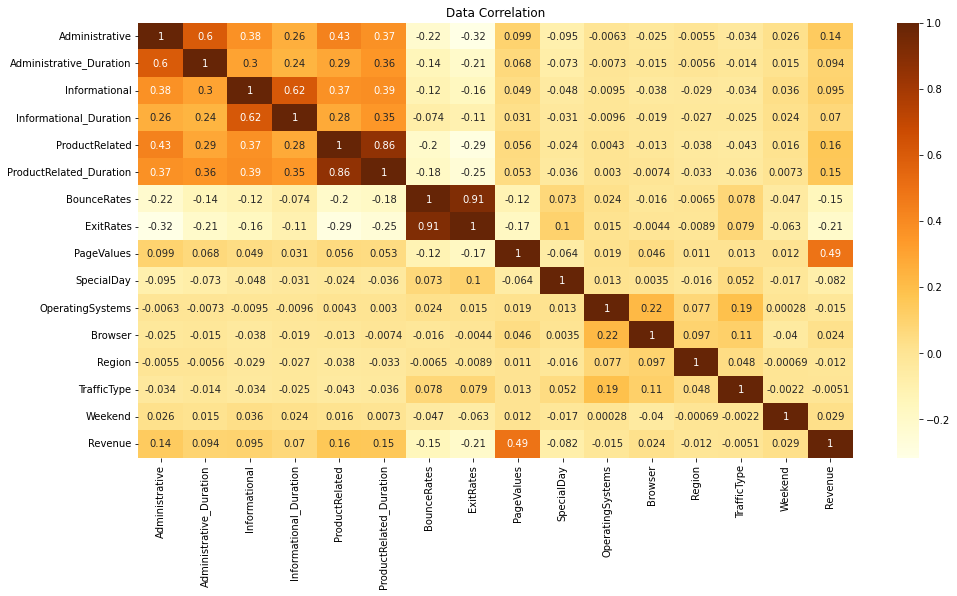

In [91]:
#importing libraries for plots matplotlib and seaborn
import warnings                      # ignoring unnecessary warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot    as plt
import seaborn              as sns

# ploting correlation between the attributes using matplotlib and seaborn
plt.figure(figsize=(16,8))
plt.title('Data Correlation')
sns.heatmap(OSI_Data_Original.corr(),annot=True,cmap='YlOrBr') 


Plotting the Pairplot to visualise the relationship between attributes using matplotlib & seaborn


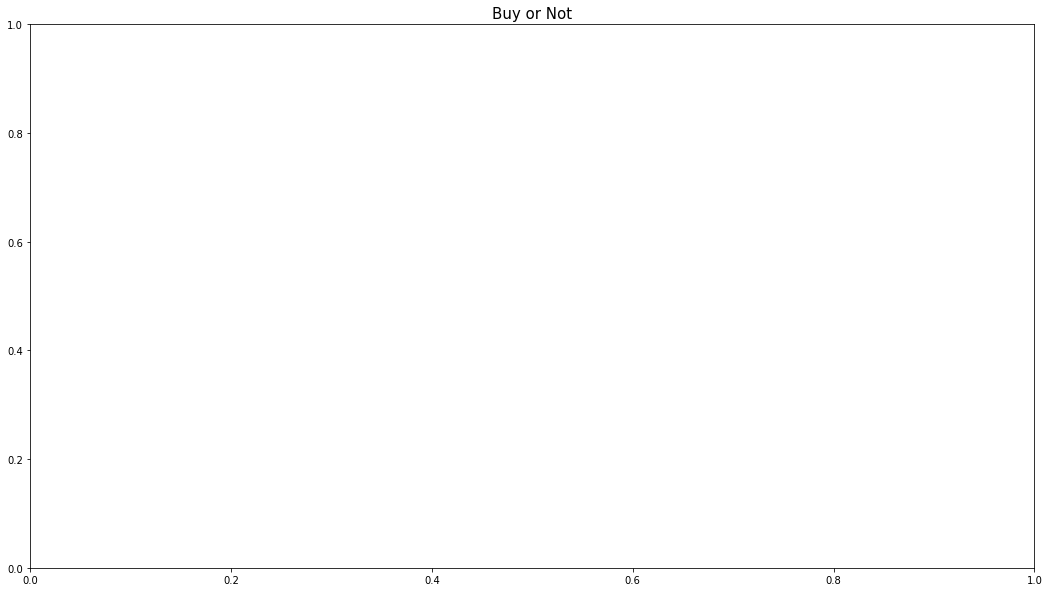

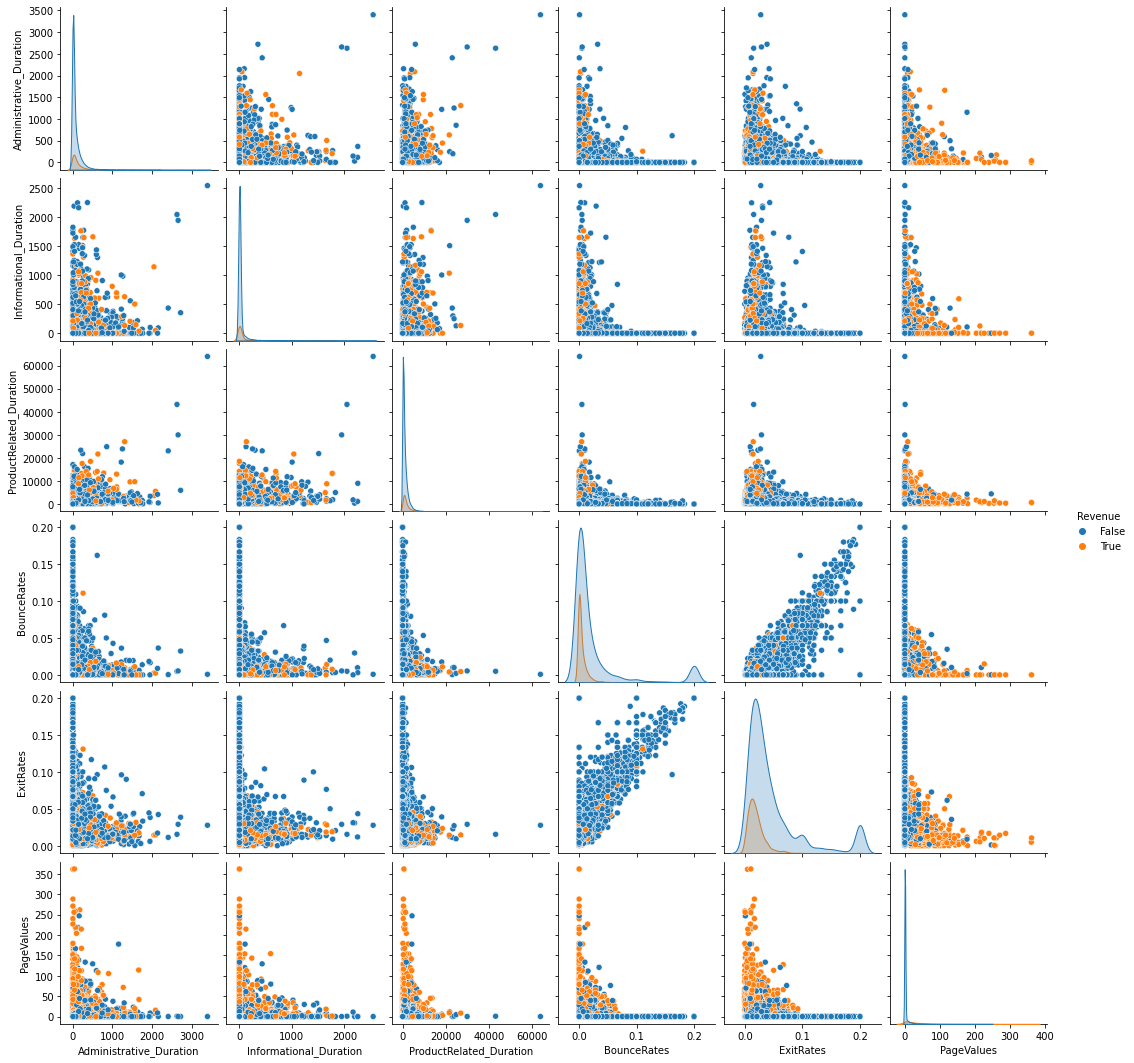

In [92]:
#importing libraries for plots matplotlib and seaborn

import matplotlib.pyplot    as plt
import seaborn              as sns

# The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.

plt.title('Buy or Not', fontsize = 15)
sns.pairplot(OSI_Data_Original[['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','Revenue']],hue='Revenue')



Plotting countplot for the 'Revenue' attribute using matplotlib & seaborn

False    10422
True      1908
Name: Revenue, dtype: int64




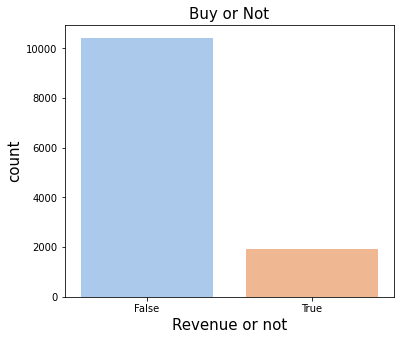

In [93]:
#importing libraries for plots matplotlib and seaborn
import warnings                      # ignoring unnecessary warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot    as plt
import seaborn              as sns

# Customer buying and not buying Visualisation
print(OSI_Data_SL['Revenue'].value_counts())

print("\n")

# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)
plt.subplot(1, 2, 1)
sns.countplot(OSI_Data_SL['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

Plotting pie chart for the 'Month' attributes using matplotlib & seaborn

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64




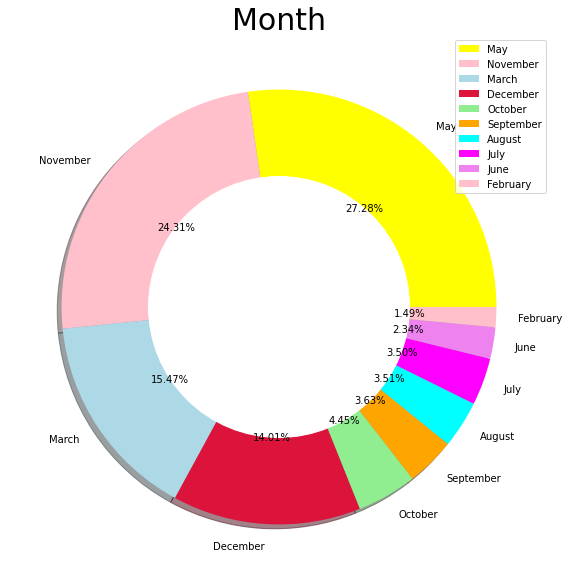

In [94]:
#importing libraries for plots matplotlib and seaborn
import matplotlib.pyplot    as plt
import seaborn              as sns


print(OSI_Data_Original['Month'].value_counts())

print("\n")
# creating a donut chart for the months variations and plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

Plotting pie chart for 'Visitor Type' attribute using matplotlib & seaborn


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64




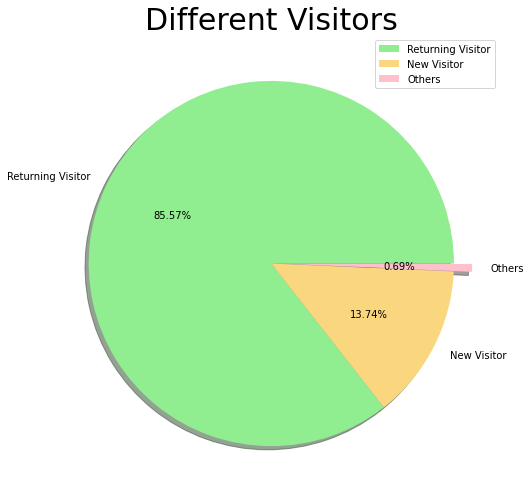

In [95]:
#importing libraries for plots matplotlib and seaborn
import matplotlib.pyplot    as plt
import seaborn              as sns


print(OSI_Data_Original['VisitorType'].value_counts())
print("\n")

# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 10)
size = [10551, 1694, 85]
colors = ['lightGreen', '#FAD77F', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Plotting the crosstab for the 'Visitor type vs Revenue' attributes using matplotlib and seaborn

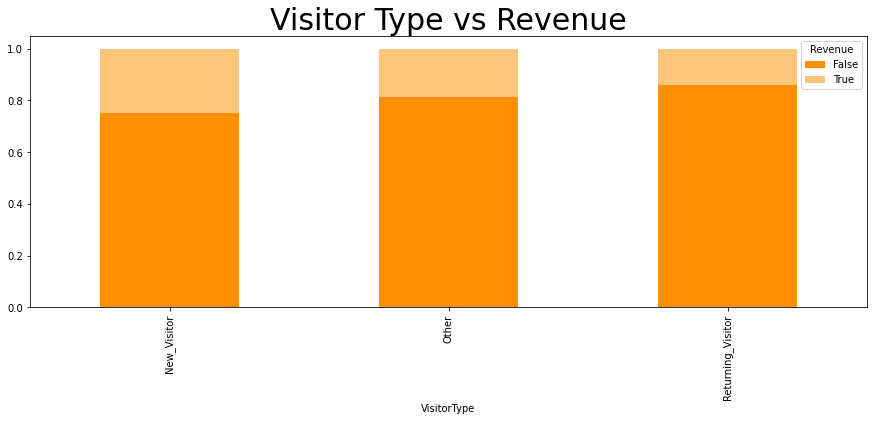

In [96]:
#importing libraries for plots matplotlib and seaborn
import matplotlib.pyplot    as plt
import seaborn              as sns

# plotting a pie chart for Visitor type vs Revenue

df = pd.crosstab(OSI_Data_Original['VisitorType'], OSI_Data_Original['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, 
                                             figsize =(15, 5), color = ['#FE8E02', '#FDC47C'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

# Supervised Learning 

Splitting the data to process the Supervised Learning models

In [106]:
# Importing of Train Test Split from sklearn model selection

from sklearn.model_selection      import train_test_split


y = OSI_Data_SL['Revenue']                    # Assining the targeted column to the y variable
x = OSI_Data_SL.drop(['Revenue'], axis = 1)   # dropping the targeted column nd assing remaining to the x variable

print(f'shape of x: {x.shape} and shape of y: {y.shape} \n')

#splitting for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state =0 )
print(f'shape of x train: {x_train.shape} and shape of x test: {x_test.shape}')
print(f'shape of y train: {y_train.shape} and shape of y test: {y_test.shape}')

shape of x: (12330, 28) and shape of y: (12330,) 

shape of x train: (7398, 28) and shape of x test: (4932, 28)
shape of y train: (7398,) and shape of y test: (4932,)


Supervised Learning model analysis
1.Support Vector Machine

In [107]:
#Importing sklearn SVM for Support Vector Machine
from sklearn                import svm
SVM_model = svm.SVC()
SVM_model.fit(x_train, y_train)

# making predictions on the testing set 
y_predict = SVM_model.predict(x_test)

print(f"Training Accuracy: {SVM_model.score(x_train, y_train)} Testing Accuracy: {SVM_model.score(x_test, y_test)}")


Training Accuracy: 0.850500135171668 Testing Accuracy: 0.8406326034063261


SVM Accuracy: 84.06326034063261

 Classification Report
               precision    recall  f1-score   support

       False       0.84      1.00      0.91      4137
        True       1.00      0.01      0.02       795

    accuracy                           0.84      4932
   macro avg       0.92      0.51      0.47      4932
weighted avg       0.87      0.84      0.77      4932



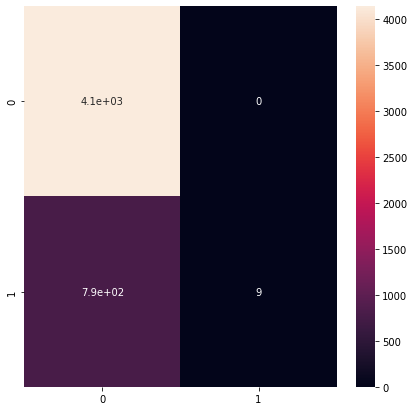

In [99]:
'''

Import scikit-learn metrics module for accuracy calculation c
Classification Report and Confusion Matrix

Importing Matplotlib pyplot and Seaborn to plot the Confusion Matric of the model

'''
from sklearn                import metrics
from sklearn.metrics        import classification_report, confusion_matrix
import matplotlib.pyplot    as plt
import seaborn              as sns


print("SVM Accuracy:",metrics.accuracy_score(y_test, y_predict)*100)
print("\n Classification Report\n",classification_report(y_test, y_predict))

SVM_Accuracy = metrics.accuracy_score(y_test, y_predict)*100
                                      
cm = metrics.confusion_matrix(y_test, y_predict)
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(cm, annot = True)
plt.show()



Supervised Learning model analysis
2.Gaussian Naive Bayes

In [100]:
# Importing GaussianNB library to perform the naive bayes model
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 


# Making predictions on the testing set 
y_pred = gnb.predict(x_test) 


# Comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

GNB_Accuracy = metrics.accuracy_score(y_test, y_pred)*100



Gaussian Naive Bayes model accuracy(in %): 79.60259529602595


In [101]:
# Determining which model is best based on the accuracy 

if GNB_Accuracy > SVM_Accuracy:
   print("Gaussian Naive Bayes Model is good based on the accurancy")
elif GNB_Accuracy < SVM_Accuracy:
   print("Support Vector Machine Model is good based on the accurancy")
else:
   print("Both Gaussian Naive Bayes Model and Support Vector Machine are good")

Support Vector Machine Model is good based on the accurancy


# UnSupervised Learning

Clustering the 'Administrative Duration vs BounceRates' using the KMeans clustering model

(12330, 2)


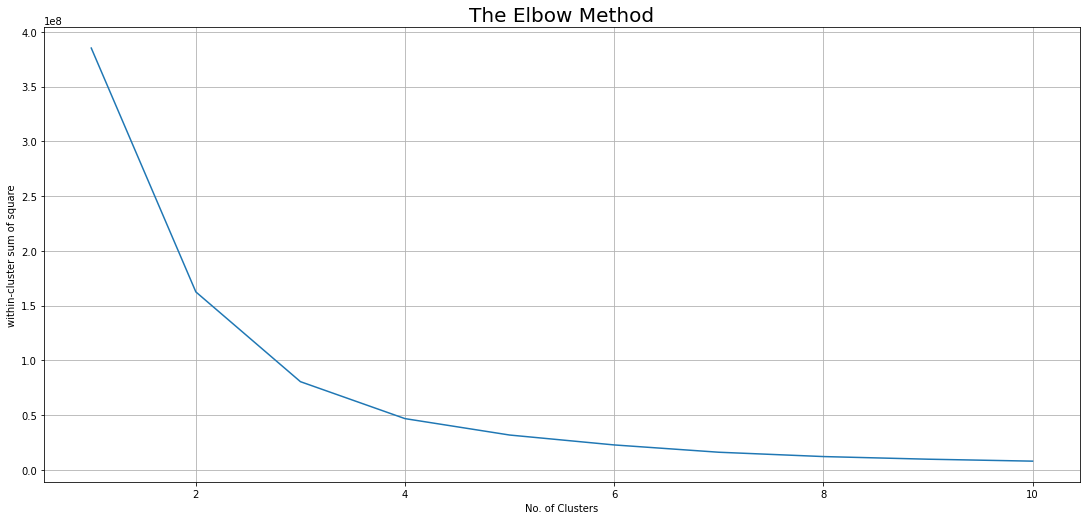

In [108]:
# Importing the KMeans library for clustering 
from sklearn.cluster import KMeans

x = OSI_Data_SL.iloc[:,[1,6]].values    # Choosing the Attributes using iloc function for clustering
print(x.shape)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# Plotting the charts     
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of square')
plt.show()


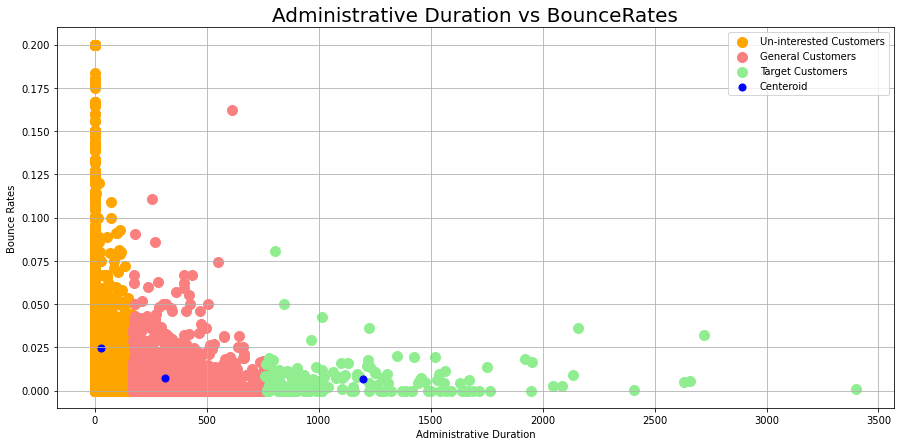

In [103]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = '#FA7F7F', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = '#90EE90', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'Centeroid')

# plotting of scatter plot
plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Clustering the 'Administrative Duration vs Region' using the KMeans clustering model


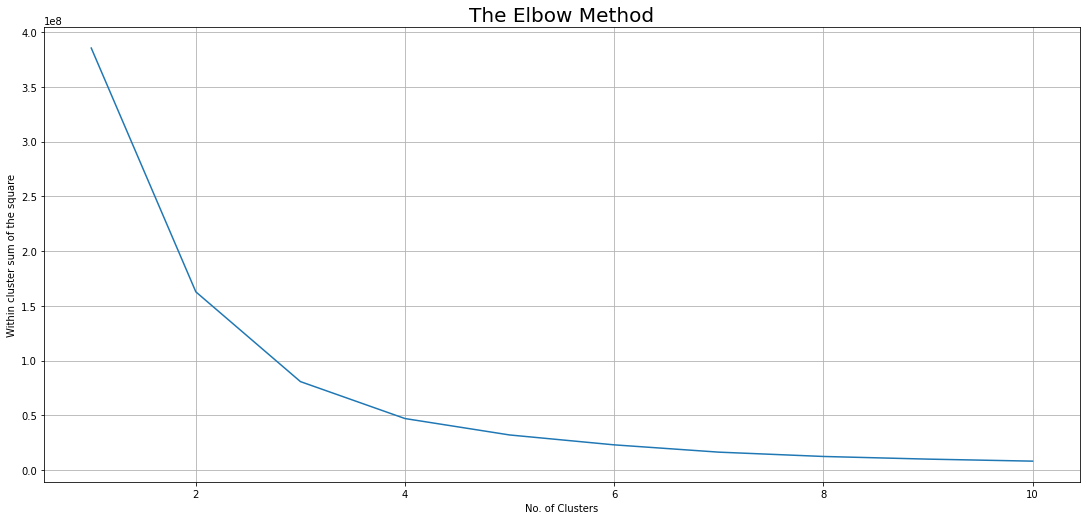

In [104]:
# Importing the KMeans library for clustering 
from sklearn.cluster import KMeans

x = OSI_Data_SL.iloc[:, [1, 13]].values     # Choosing the Attributes using iloc function for clustering

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
# Plotting the charts     
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

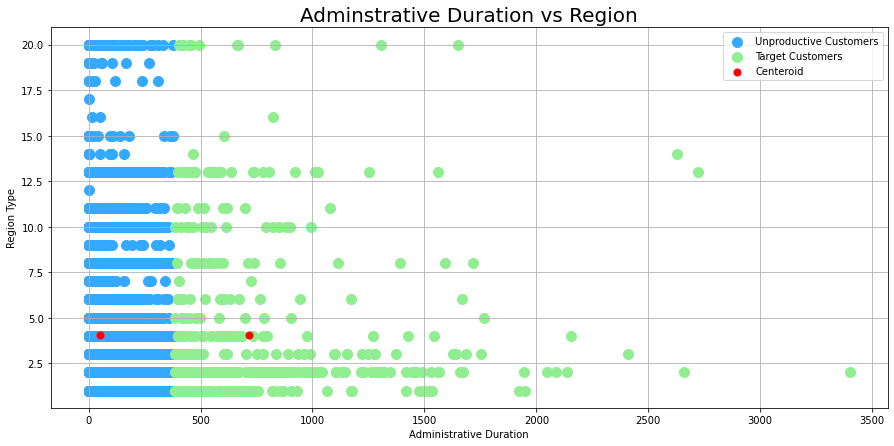

In [105]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# plotting of scatter plot
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = '#33AAFF', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = '#90EE90', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'red' , label = 'Centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()